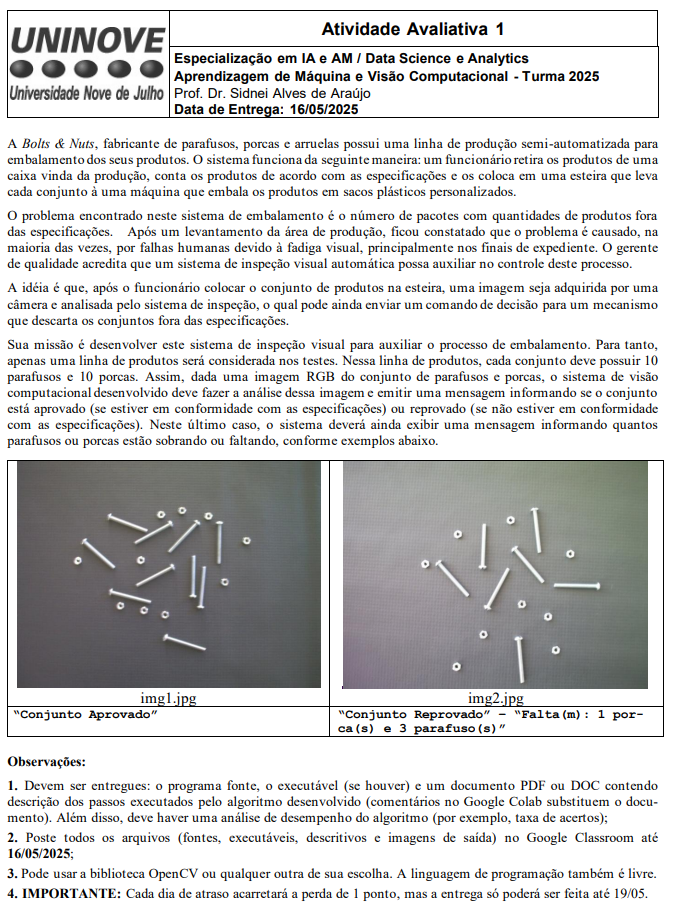

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Pós Data Science/Aprendizagem de Máquina e Visão Computacional/Atividade 1/Imagens/'

Mounted at /content/drive


img05.jpg
Conjunto Reprovado
Falta(m) 1 porca(s)
Falta(m) 1 parafuso(s)




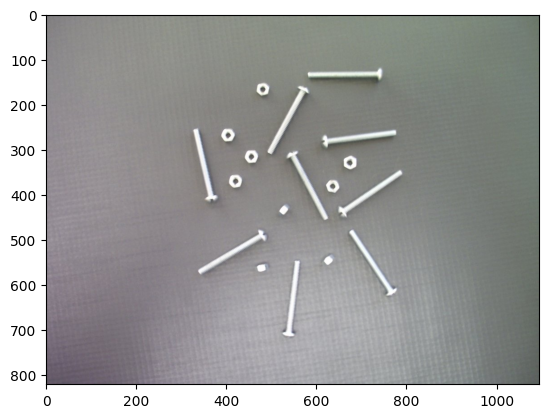

In [6]:
img_gray = cv.imread(PATH+f"img05.jpg",0)
img_RGB = cv.cvtColor(cv.imread(PATH+f"img05.jpg"),cv.COLOR_BGR2RGB)
plt.imshow(img_RGB)

thresh = 180
[thresh, img_bin] = cv.threshold(img_gray, thresh, 255, cv.THRESH_BINARY)
(numCCs, imgLabels, stats, centroids) = cv.connectedComponentsWithStats(img_bin, connectivity=4)

porca = 0
parafuso = 0
for i in range(1,numCCs):
  top_c, top_l, larg, alt, area = stats[i, [cv.CC_STAT_LEFT, cv.CC_STAT_TOP, cv.CC_STAT_WIDTH, cv.CC_STAT_HEIGHT, cv.CC_STAT_AREA]]
  if area > 700 and (alt > 80 or larg > 80):
    parafuso += 1
  elif area > 100:
    porca += 1

print(f"img05.jpg")
if porca == 10 and parafuso == 10:
  print("Conjunto Aprovado")
else:
  print("Conjunto Reprovado")
  if 10 - porca > 0:
    print(f"Falta(m) {10 - porca} porca(s)")
  elif 10 - porca < 0:
    print(f"Sobra(m) {porca - 10} porca(s)")
  if 10 - parafuso > 0:
    print(f"Falta(m) {10 - parafuso} parafuso(s)")
  elif 10 - parafuso < 0:
    print(f"Sobra(m) {parafuso - 10} parafuso(s)")
print("\r\n")